In [24]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,SimpleRNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
def CNN(path_train,path_test,name,epoch_num):
    #Split the data
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)
    
    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    # CNN
    model = Sequential()
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(22,1)))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, Y_train_binary, epochs=epoch_num, batch_size=32)
    Y_pred = model.predict(X_test).argmax(axis=1)
    
    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred))
    
    #set up plotting area
    plt.figure(0).clf()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    #fit logistic regression model and plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))
    
    #RNN
    model = Sequential()
    model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(22, 1)))
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(units=16))
    model.add(Dense(units=2, activation='sigmoid'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, Y_train_binary, epochs=10, batch_size=32)
    Y_pred = model.predict(X_test).argmax(axis=1)
    
    #fit logistic regression model and plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="RNN, AUC="+str(auc))
    
    #ANN
    clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(150))
    
    clf.fit(X_train, Y_train_binary)
    Y_pred = clf.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="MLP, AUC="+str(auc))
    
    
    #Decision Tree
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train, Y_train_binary)
    Y_predictions = clf.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
    
    #Baysian Classifier
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train_binary)
    Y_pred = classifier.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="Bayesian Classifier, AUC="+str(auc))
    
    #Random Forest
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, Y_train_binary)
    Y_pred = classifier.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
    
    #SVM
    svc = SVC()
    svc.fit(X_train, Y_train_binary.values.ravel())
    y_pred = svc.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(Y_test_binary, Y_pred)
    auc = round(metrics.roc_auc_score(Y_test_binary, Y_pred), 4)
    plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
    
    #add legend
    plt.legend()
            
    return model

# Cleveland

Epoch 1/20
7/7 [==============================] - 1s 15ms/step - loss: 0.6632 - accuracy: 0.5896
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4961 - accuracy: 0.7217
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.5355 - accuracy: 0.7830
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.5004 - accuracy: 0.7783
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4509 - accuracy: 0.7972
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4238 - accuracy: 0.8066
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4261 - accuracy: 0.8019
Epoch 8/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4187 - accuracy: 0.7925
Epoch 9/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3861 - accuracy: 0.8160
Epoch 10/20
7/7 [==============================] - 0s 16ms/step - loss: 0.3807 - accuracy: 0.8255
Epoch 11/20
7/7 [============

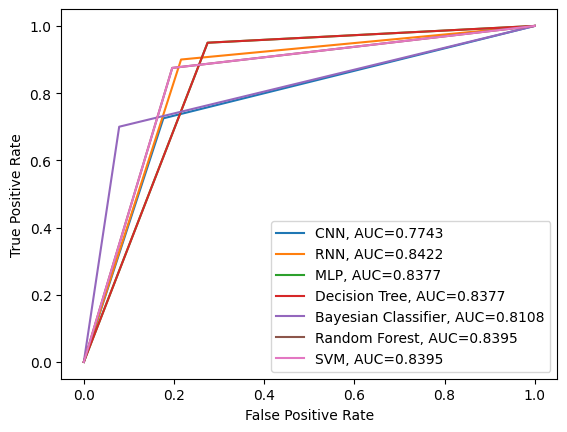

In [26]:
path_train = '../TrainTestData/cle_train.csv'
path_test = '../TrainTestData/cle_test.csv'
model = CNN(path_train,path_test,'cle',20)